In [29]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from mlxtend.plotting import plot_confusion_matrix

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
pd.Series(y).value_counts()

0    284315
1       492
dtype: int64

In [17]:
pd.Series(y).value_counts()/len(y)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [16]:
%%time 

target = "Class"
X = df.loc[:, "V1":"V28"]
#del X[target]
y = df[target]

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1
    #                        , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

Training
accuracy: 0.999207
precision: 0.890196
recall: 0.635854

Test
accuracy: 0.999157
precision: 0.838710
recall: 0.577778
CPU times: user 2.55 s, sys: 193 ms, total: 2.74 s
Wall time: 2.44 s


In [11]:
pd.Series(y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1d029e48>)

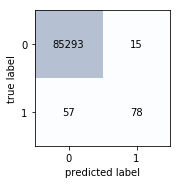

In [18]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ebda320>)

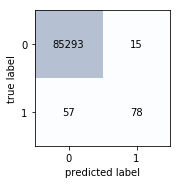

In [26]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0.5,1,'ROC, auc: 0.966943')

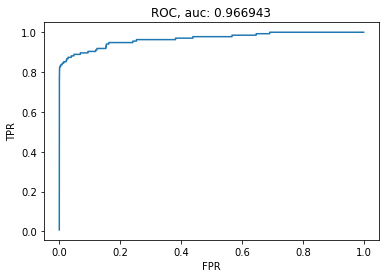

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % metrics.auc(fpr, tpr) )